In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Heuristic stats

In [38]:
df = pd.read_csv("heuristic_data.csv")
df.sample(5)

,Scramble,Scramble Length,Heuristic Type,Heuristic,Wall Time (ns)
43776,L U D R L' B' F' R' B U' L' U' L' D' R,15,All L0,1.750000,263300
643,B,1,Single L0,0.666667,20500
21950,F' L' B U B' U' R L' F' R' B D R' B' B' D' U L...,22,Single L0,1.916667,21000
21866,F L' R' D U F R' R' B F' R U' B F L' F D U L F...,22,Single L0,1.500000,21100
39511,D R R L' D' R B' R D' D' L,11,All L0,1.833333,264700


In [39]:
# check if all heuristics are admissible
(df["Heuristic"] <= df["Scramble Length"]).all()

True

In [41]:
selected_df = df[["Heuristic Type", "Scramble Length", "Heuristic", "Wall Time (ns)"]]
grouped = selected_df.groupby(["Scramble Length", "Heuristic Type"])
l_avg = grouped.mean()
l_avg.sample(5)

,,Heuristic,Wall Time (ns)
Scramble Length,Heuristic Type,,
24,All L0,1.671917,272258.0
7,Single L0,1.629333,21583.5
16,Single L0,1.671667,21817.0
2,Single L0,1.149000,22104.5
25,Single L0,1.671583,21833.6


<AxesSubplot:xlabel='Heuristic Type', ylabel='Wall Time (ns)'>

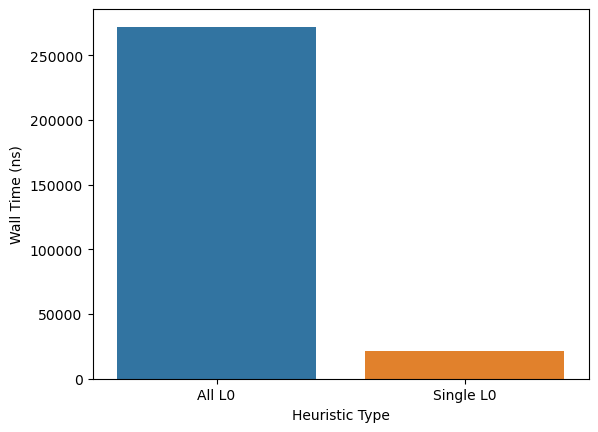

In [42]:
avg = selected_df.groupby(["Heuristic Type"]).mean().reset_index()

sns.barplot(data=avg, x="Heuristic Type", y="Wall Time (ns)")

<AxesSubplot:xlabel='Scramble Length', ylabel='Heuristic'>

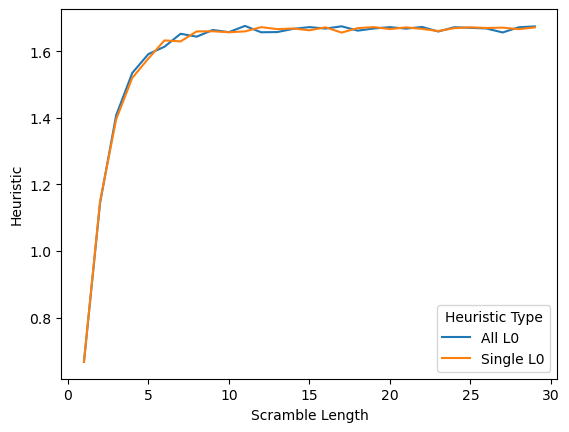

In [43]:
sns.lineplot(data=l_avg, x="Scramble Length", y="Heuristic", hue="Heuristic Type")

# draw the scramble length ceiling line
# sns.lineplot(data=l_avg, x="Scramble Length", y="Scramble Length", linestyle='--', color='black', label="Ceiling")

# plt.yscale("log")

# IDA* stats

In [44]:
df = pd.read_csv('idastar_stats.csv')
df.sample(5)

,Scramble,Scramble Length,Solution,Solution Length,Heuristic Type,Wall Time (ns),Node Visited
315,D,1,U',1,All L0,8539900,21
332,R' F,2,F' R,2,All L0,2442100,7
308,R,1,R',1,All L0,3051100,6
58,R R,2,R' R',2,All L0,8196500,18
358,R' R' R' L,4,R' R',2,All L0,65172400,205


In [46]:
selected_df = df[["Heuristic Type", "Scramble Length", "Wall Time (ns)", "Node Visited"]]
grouped = selected_df.groupby(["Scramble Length", "Heuristic Type"])
avg = grouped.mean().reset_index()
avg.sample(5)

,Scramble Length,Heuristic Type,Wall Time (ns),Node Visited
13,7,Single L0,6.532063e+09,135833.187500
11,6,Single L0,2.835058e+09,58833.937500
3,2,Single L0,4.738294e+06,92.694444
7,4,Single L0,1.023064e+08,2111.666667
5,3,Single L0,2.388592e+07,488.277778


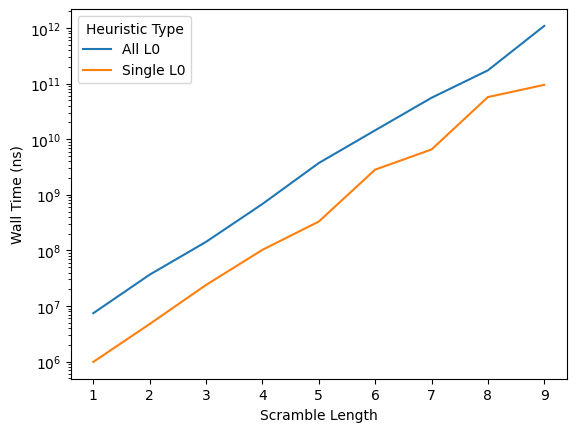

In [47]:
sns.lineplot(data=avg, x="Scramble Length", y="Wall Time (ns)", hue="Heuristic Type")
plt.yscale("log")

<AxesSubplot:xlabel='Scramble Length', ylabel='Node Visited'>

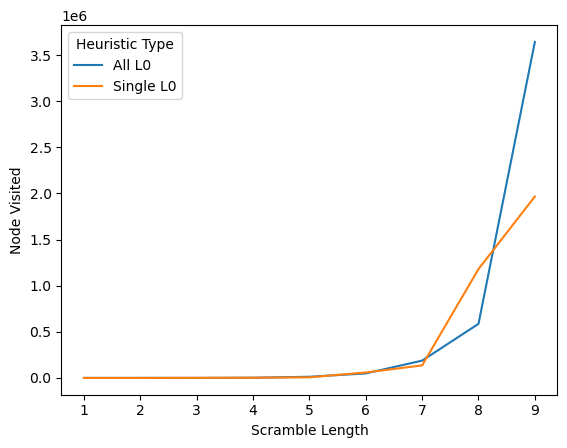

In [48]:
sns.lineplot(data=avg, x="Scramble Length", y="Node Visited", hue="Heuristic Type")
# plt.yscale("log")